#CAR DETECTIONS

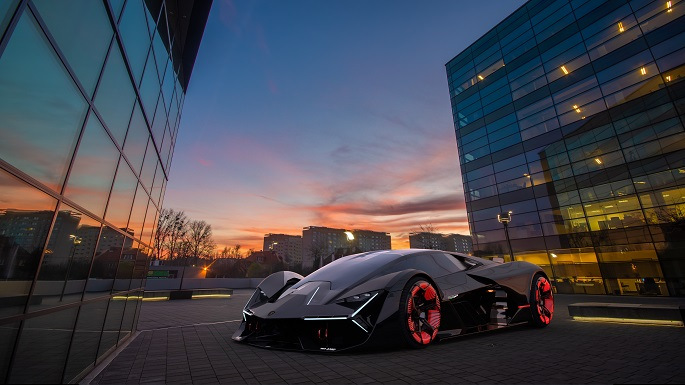

Pada era perkembangan teknologi informasi dan kecerdasan buatan, pengembangan model deteksi gambar menjadi suatu kebutuhan penting untuk berbagai aplikasi, termasuk pengenalan jenis mobil. Mobil sebagai salah satu sarana transportasi utama telah menjadi bagian integral dari kehidupan sehari-hari. Oleh karena itu, pengembangan sistem deteksi gambar untuk mengidentifikasi jenis-jenis mobil menjadi semakin relevan. Model ini akan memungkinkan pengguna untuk secara otomatis mengenali dan mengklasifikasikan berbagai jenis mobil dengan akurasi tinggi, memberikan kontribusi positif terhadap berbagai industri seperti pengawasan lalu lintas, keamanan, dan otomotif.

##UNZIP DATA

In [ ]:
import os
import zipfile

# unzip dataset yang masih berbentuk file zip
zip_ref = zipfile.ZipFile("/content/Car.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

In [ ]:
train_dir = '/content/Car/train'
validation_dir = '/content/Car/validation'

train_data_car = os.listdir(train_dir + '/car/')
train_data_truck = os.listdir(train_dir + '/truck/')
train_data_taxi = os.listdir(train_dir + '/taxi/')
train_data_autorickshaw = os.listdir(train_dir + '/auto rickshaw/')

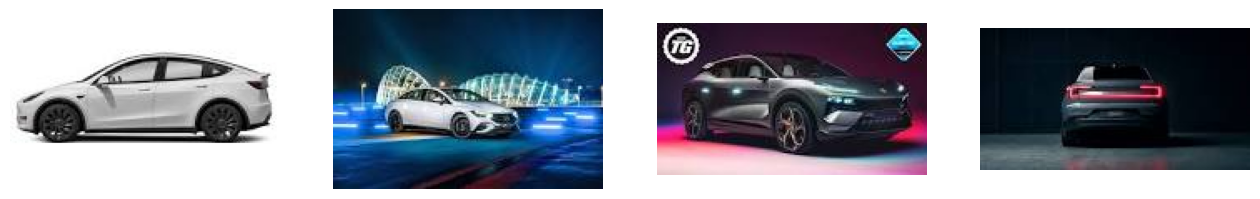

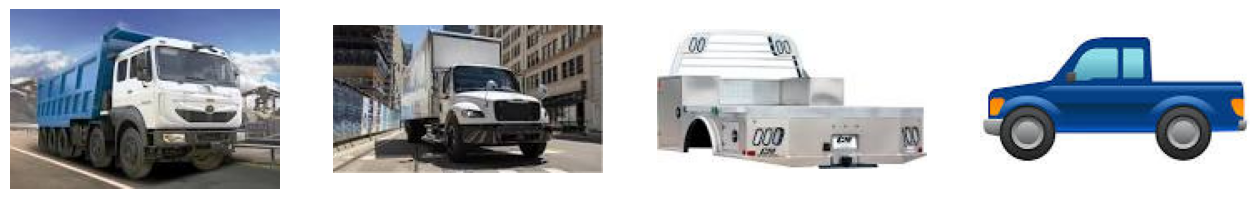

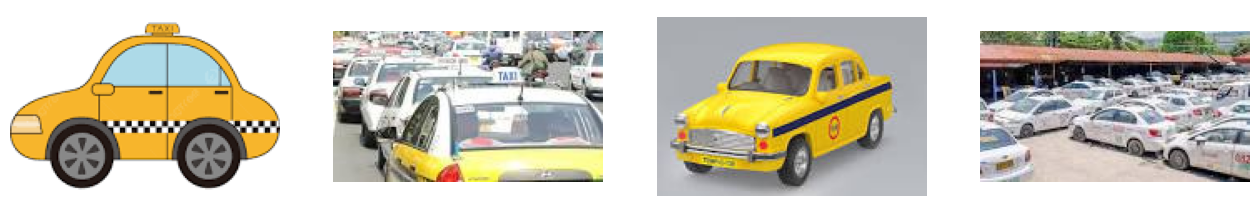

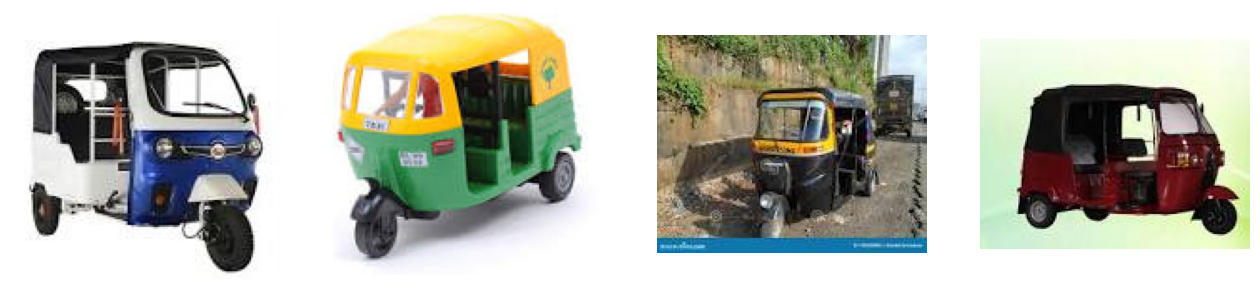

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 1)

next_car_pic = train_data_car[:4]
next_truck_pic = train_data_truck[:4]
next_taxi_pic = train_data_taxi[:4]
next_autorickshaw_pic = train_data_autorickshaw[:4]

for i, img_path in enumerate(next_car_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(1, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/car/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 1)

for i, img_path in enumerate(next_truck_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(1, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/truck/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 1)

for i, img_path in enumerate(next_taxi_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(1, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/taxi/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 1)

for i, img_path in enumerate(next_autorickshaw_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(1, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/auto rickshaw/' + img_path)
  plt.imshow(img)
plt.show()

##PRE-PROCESSING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# melakukan image augmentation pada dataset untuk menambah variasi data
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
                                   #dtype=tf.float32

test_datagen = ImageDataGenerator( rescale = 1.0/255.,)
                                   #dtype=tf.float32)

# melakukan data generator untuk membaca dataset training di setiap label
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))

# # melakukan data generator untuk membaca dataset testing di setiap label
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical',
                                                          target_size = (224, 224))

Found 1087 images belonging to 4 classes.
Found 541 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

In [ ]:
#@title Pilih Pretrained Model :  { display-mode: "both" }
Model = "MobileNet" #@param ["VGG16", "MobileNet", "InceptionNet", "ResNet"]

# Pilihan pretrained model yang dapat digunakan di sesi ini
if Model == "VGG16":
  base_model = VGG16(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

elif Model == "ResNet50":
  base_model = ResNet50(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

elif Model == "MobileNet":
  base_model = MobileNet(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

else:
  base_model = InceptionV3(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

print("Anda akan menggunakan model : ", Model)

# membuat base model tidak diikutkan proses training
for layer in base_model.layers:
  layer.trainable = False

17225924/17225924 [==============================] - 0s 0us/step
Anda akan menggunakan model :  MobileNet


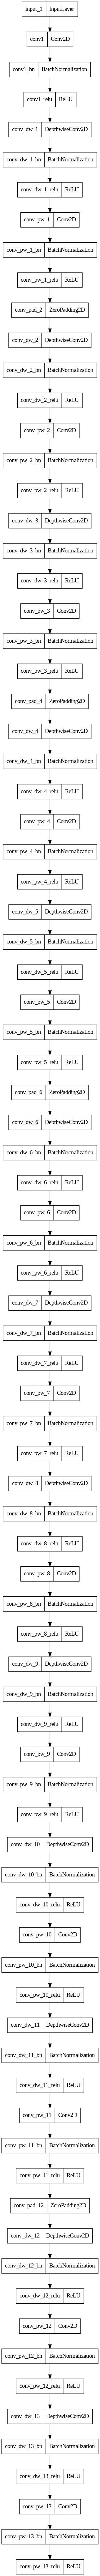

In [ ]:
# membuat visualisasi plot arsetektur yang telah kita pilih
plot_model(base_model, to_file='my_base_model.png')

In [ ]:
# kita juga bisa menggunakan .summary() untuk menampilkan arsitektur kita
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
import tensorflow as tf


x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.15)(x)

outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    validation_steps=validation_generator.n // validation_generator.batch_size,
                    epochs=10)

Epoch 1/10
33/33 [==============================] - 102s 3s/step - loss: 1.1181 - accuracy: 0.5384 - val_loss: 0.5741 - val_accuracy: 0.8105
Epoch 2/10
33/33 [==============================] - 106s 3s/step - loss: 0.7532 - accuracy: 0.7033 - val_loss: 0.4143 - val_accuracy: 0.8574
Epoch 3/10
33/33 [==============================] - 106s 3s/step - loss: 0.5975 - accuracy: 0.7801 - val_loss: 0.3546 - val_accuracy: 0.8828
Epoch 4/10
33/33 [==============================] - 104s 3s/step - loss: 0.5608 - accuracy: 0.7820 - val_loss: 0.3263 - val_accuracy: 0.8848
Epoch 5/10
33/33 [==============================] - 105s 3s/step - loss: 0.4832 - accuracy: 0.8142 - val_loss: 0.3338 - val_accuracy: 0.8867
Epoch 6/10
33/33 [==============================] - 102s 3s/step - loss: 0.4882 - accuracy: 0.8190 - val_loss: 0.3188 - val_accuracy: 0.8848
Epoch 7/10
33/33 [==============================] - 103s 3s/step - loss: 0.4694 - accuracy: 0.8246 - val_loss: 0.3108 - val_accuracy: 0.8906
Epoch 8/10
33

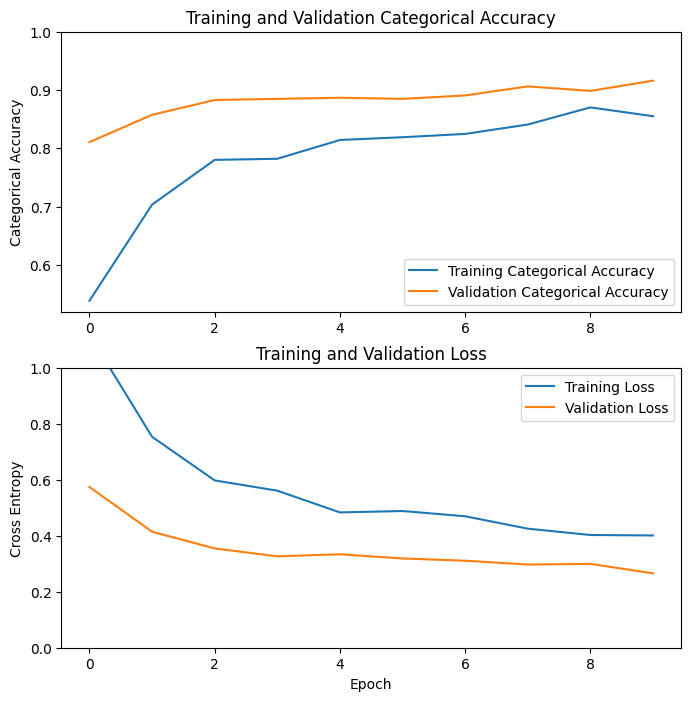

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Categorical Accuracy')
plt.plot(val_acc, label='Validation Categorical Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Categorical Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Categorical Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


17/17 [==============================] - 24s 1s/step


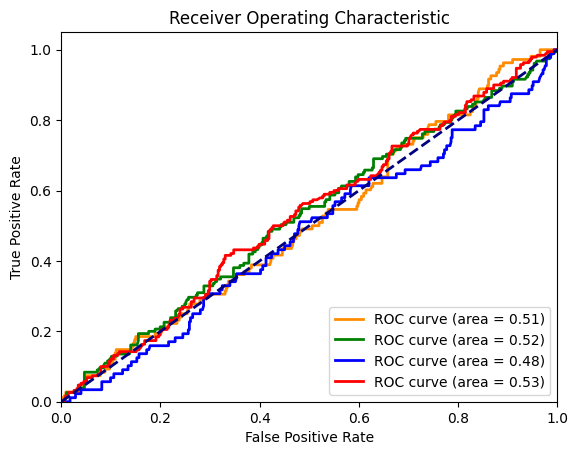

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Prediksi dari model
preds = model.predict(validation_generator, verbose=1)

# Mengubah label ke format one-hot encoding
true_labels = label_binarize(validation_generator.classes, classes=np.arange(4))

# Menghitung ROC AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves untuk setiap kelas
plt.figure()
lw = 2
colors = ['darkorange', 'green', 'blue', 'red']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Saving ppp.jpg to ppp.jpg


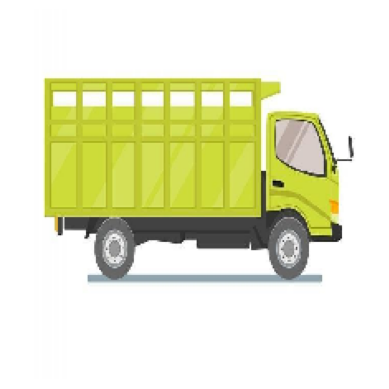

1/1 [==============================] - 1s 613ms/step

 Ini adalah truk


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

uploaded = files.upload()

for fn in uploaded.keys():

    # Memprediksi gambar
    path = '/content/' + fn
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Memprediksi kelas untuk gambar
    classes = model.predict(x)

    # Menggunakan argmax untuk menentukan kelas yang memiliki probabilitas tertinggi
    predicted_class = np.argmax(classes)

    # Menampilkan hasil prediksi sesuai dengan kelas
    if predicted_class == 0:
        print("\n Ini adalah bajaj")
    elif predicted_class == 1:
        print("\n Ini adalah mobil")
    elif predicted_class == 2:
        print("\n Ini adalah taxi")
    elif predicted_class == 3:
        print("\n Ini adalah truk")
    else:
        print("\n Tidak dapat menentukan kelas")